# Analysis of ODI matches played between 1971-2017 using Numpy, Pandas & Seaborn

This project contains the analysis of all the ODI matches played between Jan,1971-Aug,2017 (downloaded from: https://www.kaggle.com/datasets/jaykay12/odi-cricket-matches-19712017). Project is part of my free learning course "Data Analysis with Python: Zero to Pandas"(checkout at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas)


## Downloading the Dataset


Let's start off by downloading the data set from 'https://www.kaggle.com/datasets/jaykay12/odi-cricket-matches-19712017' 

In [209]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [210]:
dataset_url = 'https://www.kaggle.com/datasets/jaykay12/odi-cricket-matches-19712017' 

In [212]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./odi-cricket-matches-19712017" (use force=True to force download)


The dataset has been downloaded and extracted.

In [213]:
data_dir = './odi-cricket-matches-19712017'

In [214]:
import os
os.listdir(data_dir)

['ContinousDataset.csv',
 'LabelledDataset.csv',
 'CategoricalDataset.csv',
 'originalDataset.csv']

## Data Preparation and Cleaning

 Before we begin our analysis we need to clean the data so as to derive more meaningful results from it.

In [219]:
import pandas as pd
import numpy as np

In [220]:
odi_df = pd.read_csv(data_dir+'/ContinousDataset.csv')

In [221]:
odi_df

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,3747,ODI # 3931,New Zealand,India,Winner2ndInning,Pune,"Oct 25, 2017",India,India,Away,Home,First,Second
7490,3748,ODI # 3932,New Zealand,India,Winner1stInning,Kanpur,"Oct 29, 2017",India,India,Away,Home,Second,First
7491,3749,ODI # 3933,Namibia,Hong Kong,Winner2ndInning,Mumbai,"Aug 12, 2017",Namibia,India,Neutral,Neutral,Second,First
7492,3750,ODI # 3934,U.S.A.,Bermuda,Winner2ndInning,Mumbai,"Aug 12, 2017",U.S.A.,India,Neutral,Neutral,Second,First


We can see there is duplicate row data and an extra column ('Unnamed: 0')

In [222]:
# Remove repeating data
x=np.arange(3747,7494)
odi_df.drop(x,inplace=True)
odi_df.drop(columns=['Unnamed: 0'],inplace=True)

In [224]:
odi_df

,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second
...,...,...,...,...,...,...,...,...,...,...,...,...
3742,ODI # 3931,India,New Zealand,Winner2ndInning,Pune,"Oct 25, 2017",India,India,Home,Away,Second,First
3743,ODI # 3932,India,New Zealand,Winner1stInning,Kanpur,"Oct 29, 2017",India,India,Home,Away,First,Second
3744,ODI # 3933,Hong Kong,Namibia,Winner2ndInning,Mumbai,"Aug 12, 2017",Namibia,India,Neutral,Neutral,First,Second
3745,ODI # 3934,Bermuda,U.S.A.,Winner2ndInning,Mumbai,"Aug 12, 2017",U.S.A.,India,Neutral,Neutral,First,Second


Rename for better reusability

In [225]:
odi_df['Margin'] = odi_df['Margin'].replace(['Winner2ndInning'],'2')
odi_df['Margin'] = odi_df['Margin'].replace(['Winner1stInning'],'1')

odi_df['Innings_Team1'] = odi_df['Innings_Team1'].replace(['Second'],'2')
odi_df['Innings_Team1'] = odi_df['Innings_Team1'].replace(['First'],'1')

odi_df['Innings_Team2'] = odi_df['Innings_Team2'].replace(['Second'],'2')
odi_df['Innings_Team2'] = odi_df['Innings_Team2'].replace(['First'],'1')

In [226]:
odi_df.rename(columns = {'Team 1':'Team1', 'Team 2':'Team2','Margin':'WinnerBatInnings','Match Date':'Match_date'}, inplace = True)
odi_df

,Scorecard,Team1,Team2,WinnerBatInnings,Ground,Match_date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,ODI # 1,Australia,England,2,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,2,1
1,ODI # 2,England,Australia,2,Manchester,"Aug 24, 1972",England,England,Home,Away,2,1
2,ODI # 3,England,Australia,2,Lord's,"Aug 26, 1972",Australia,England,Home,Away,1,2
3,ODI # 4,England,Australia,2,Birmingham,"Aug 28, 1972",England,England,Home,Away,2,1
4,ODI # 5,New Zealand,Pakistan,1,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3742,ODI # 3931,India,New Zealand,2,Pune,"Oct 25, 2017",India,India,Home,Away,2,1
3743,ODI # 3932,India,New Zealand,1,Kanpur,"Oct 29, 2017",India,India,Home,Away,1,2
3744,ODI # 3933,Hong Kong,Namibia,2,Mumbai,"Aug 12, 2017",Namibia,India,Neutral,Neutral,1,2
3745,ODI # 3934,Bermuda,U.S.A.,2,Mumbai,"Aug 12, 2017",U.S.A.,India,Neutral,Neutral,1,2


In [227]:
odi_df['WinnerBatInnings']=pd.to_numeric(odi_df.WinnerBatInnings,errors='coerce')
odi_df['Innings_Team1']=pd.to_numeric(odi_df.Innings_Team1,errors='coerce')
odi_df['Innings_Team2']=pd.to_numeric(odi_df.Innings_Team2,errors='coerce')
odi_df['Match_date']=pd.to_datetime(odi_df.Match_date,errors='coerce')


In [235]:
odi_df.head(20)

,Scorecard,Team1,Team2,WinnerBatInnings,Ground,Match_date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,ODI # 1,Australia,England,2,Melbourne,1971-01-05,Australia,Australia,Home,Away,2,1
1,ODI # 2,England,Australia,2,Manchester,1972-08-24,England,England,Home,Away,2,1
2,ODI # 3,England,Australia,2,Lord's,1972-08-26,Australia,England,Home,Away,1,2
3,ODI # 4,England,Australia,2,Birmingham,1972-08-28,England,England,Home,Away,2,1
4,ODI # 5,New Zealand,Pakistan,1,Christchurch,1973-02-11,New Zealand,New Zealand,Home,Away,1,2
5,ODI # 6,England,New Zealand,2,Swansea,1973-07-18,England,England,Home,Away,2,1
6,ODI # 8,England,West Indies,2,Leeds,1973-09-05,England,England,Home,Away,2,1
7,ODI # 9,England,West Indies,2,The Oval,1973-09-07,West Indies,England,Home,Away,1,2
8,ODI # 10,New Zealand,Australia,2,Dunedin,1974-03-30,Australia,New Zealand,Home,Away,1,2
9,ODI # 11,New Zealand,Australia,1,Christchurch,1974-03-31,Australia,New Zealand,Home,Away,2,1


In [229]:
type(odi_df.loc[243])


pandas.core.series.Series

In [230]:
unique_teams=list(odi_df['Team1'].unique())
y=list(odi_df['Team2'].unique())
for team2 in y:
    if team2 not in unique_teams:
        unique_teams.append(team2)
unique_teams

['Australia',
 'England',
 'New Zealand',
 'East Africa',
 'Sri Lanka',
 'Pakistan',
 'India',
 'West Indies',
 'Canada',
 'Bangladesh',
 'South Africa',
 'Zimbabwe',
 'U.A.E.',
 'Netherlands',
 'Kenya',
 'Scotland',
 'Namibia',
 'Hong Kong',
 'Bermuda',
 'Ireland',
 'Afghanistan',
 'P.N.G.',
 'U.S.A.']

In [231]:
Grounds=odi_df['Ground'].unique()
Grounds

array(['Melbourne', 'Manchester', "Lord's", 'Birmingham', 'Christchurch',
       'Swansea', 'Leeds', 'The Oval', 'Dunedin', 'Nottingham',
       'Adelaide', 'Auckland', 'Scarborough', 'Sialkot', 'Albion',
       'Sahiwal', 'Lahore', "St John's", 'Castries', 'Quetta', 'Sydney',
       'Brisbane', 'Karachi', 'Perth', 'Kingstown', 'Hamilton',
       'Ahmedabad', 'Jalandhar', 'Cuttack', 'Colombo', 'Wellington',
       'Amritsar', 'Delhi', 'Hyderabad', 'Bengaluru', 'Gujranwala',
       'Multan', 'Port of Spain', 'Napier', "St George's", 'Taunton',
       'Leicester', 'Bristol', 'Worcester', 'Southampton', 'Derby',
       'Tunbridge Wells', 'Chelmsford', 'Jaipur', 'Srinagar', 'Vadodara',
       'Indore', 'Jamshedpur', 'Guwahati', 'Moratuwa', 'Sharjah',
       'Kingston', 'New Delhi', 'Peshawar', 'Faisalabad', 'Pune',
       'Hobart', 'Nagpur', 'Chandigarh', 'Bridgetown', 'Rawalpindi',
       'Launceston', 'Kandy', 'Rajkot', 'Kanpur', 'Mumbai', 'Devonport',
       'Kolkata', 'Chennai', 'Farid

## Exploratory Analysis and Visualization

For the analysis of our cleaned dataset, we will employ various visualizations to study patterns and derive inferences.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [435]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Q- Top 10 grounds by number of matches played?

In [101]:
grounds=odi_df.Ground.value_counts().head(10)
grounds

Sharjah      226
Colombo      179
Dhaka        154
Melbourne    150
Sydney       147
Harare       134
Adelaide      80
Perth         79
Nairobi       77
Brisbane      72
Name: Ground, dtype: int64

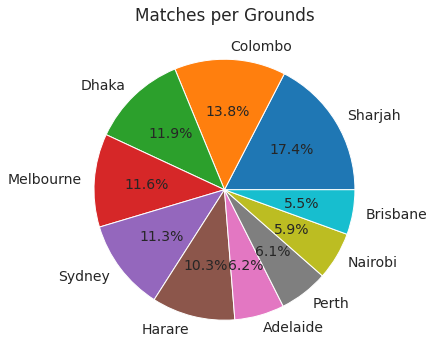

In [405]:
plt.figure(figsize=(15,6))
plt.title('Matches per Grounds')
plt.pie(grounds,labels=grounds.index,autopct='%1.1f%%');

#### Q- Which countries have played the maximum number of matches and plot them as a bar graph.

In [32]:
Team1_df=odi_df.Team1.value_counts()
Team2_df=odi_df.Team2.value_counts()
Total_df=Team1_df+Team2_df
Total_df.sort_values(ascending=False,inplace=True)
head_count=Total_df.head(100)
head_count['U.S.A.']=3
head_count

India           880.0
Australia       859.0
Pakistan        854.0
Sri Lanka       766.0
West Indies     731.0
New Zealand     686.0
England         664.0
South Africa    561.0
Zimbabwe        474.0
Bangladesh      328.0
Kenya           149.0
Ireland         113.0
Scotland         87.0
Afghanistan      81.0
Canada           75.0
Netherlands      72.0
Bermuda          36.0
U.A.E.           35.0
Hong Kong        18.0
P.N.G.           10.0
Namibia           8.0
East Africa       4.0
U.S.A.            3.0
dtype: float64

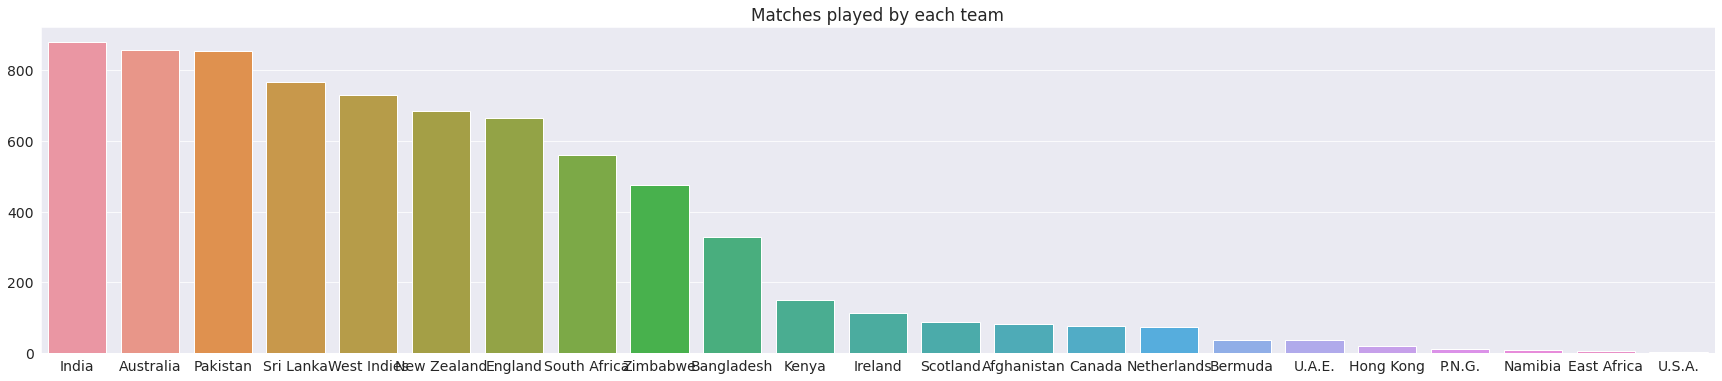

In [33]:
plt.figure(figsize=(30,6))
plt.title("Matches played by each team")
sns.barplot(x=head_count.index,y=head_count);

#### Q- How many neutral venue games?

In [39]:
(odi_df.Venue_Team1=='Neutral').sum()

1138

#### Q- Which countries played most neutral games?

In [64]:
Neutral_df=odi_df[odi_df.Venue_Team1=='Neutral']
Team1_df=Neutral_df.Team1.value_counts()
Team2_df=Neutral_df.Team2.value_counts()
Total_neutral_df=(Team1_df+Team2_df).sort_values(ascending=False).head(10)
Total_neutral_df

Pakistan        387.0
India           290.0
Sri Lanka       285.0
West Indies     222.0
New Zealand     179.0
Australia       155.0
South Africa    144.0
England         120.0
Bangladesh       64.0
Kenya            51.0
dtype: float64

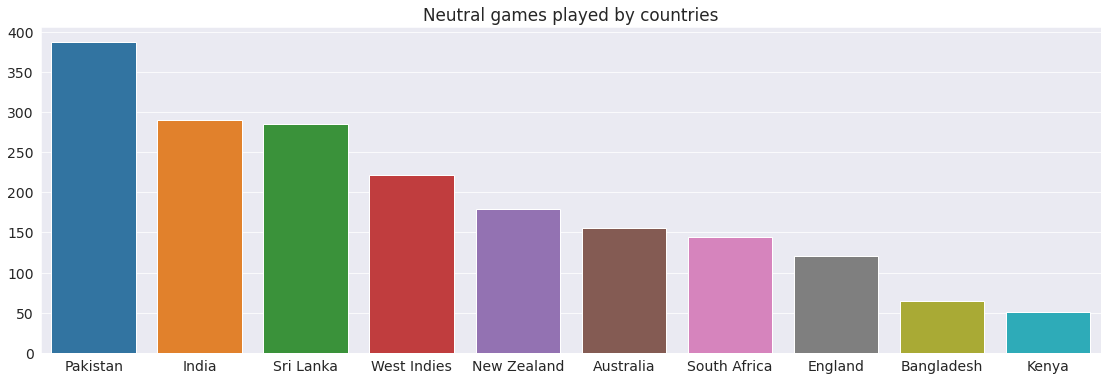

In [68]:
plt.figure(figsize=(19,6))
plt.title("Neutral games played by countries")
sns.barplot(x=Total_neutral_df.index,y=Total_neutral_df);

  #### Q- What % of total games are played at neutral venues?

Total_neutral_games: 1138
Non_neutral_games: 2609
Total_games: 3747


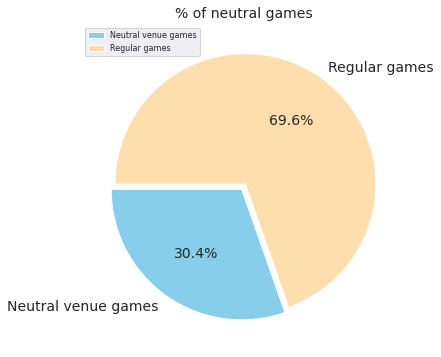

In [135]:
Total_neutral_games=Neutral_df.Scorecard.count()
print("Total_neutral_games: {}".format(Total_neutral_games))
Non_neutral_games=Total_games-Total_neutral_games
print("Non_neutral_games: {}".format(Non_neutral_games))
Total_games=odi_df.Scorecard.count()
print("Total_games: {}".format(Total_games))
arr={'Neutral venue games' : Total_neutral_games,
     'Regular games' : Non_neutral_games}
plt.figure(figsize=(120,6))
plt.title('% of neutral games',fontsize=14,loc='center')
Labels = [k for k in arr.keys()]
Data   = [float(v) for v in arr.values()]
plt.pie(x = Data, labels=Labels, colors=['skyblue','navajowhite'],explode=(0.025,0.025),autopct='%1.1f%%', startangle=180)
plt.legend(loc='upper left',fontsize=8);

#### Q-  Which teams played most matches against each other?

In [318]:
x=(odi_df.Team1+ ':' + odi_df.Team2).value_counts().head(10)
x

Pakistan:Sri Lanka       110
Pakistan:West Indies      99
India:Pakistan            99
Australia:West Indies     90
India:Sri Lanka           87
Australia:Pakistan        84
India:West Indies         83
Australia:New Zealand     78
New Zealand:Pakistan      75
Australia:England         73
dtype: int64

Pakistan and Sri lanka have faced each other the most number of times

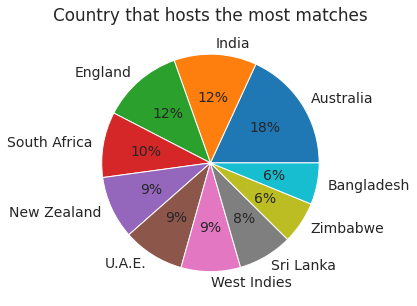

In [337]:
plt.title('Country that hosts the most matches')
host=odi_df.Host_Country.value_counts().head(10)
plt.pie(host,labels=host.index,autopct='%1.0f%%');

   #### Q- Most number of matches played on the same day?

In [501]:
Most_matches_per_day=odi_df.Match_date.value_counts().head(20)

In [502]:
Most_matches_per_day

2007-02-04    6
1975-06-07    4
1983-06-20    4
1975-06-11    4
2007-01-31    4
2007-02-02    4
1979-06-09    4
1983-06-18    4
1983-06-13    4
2010-07-10    4
1975-06-14    4
2007-01-21    3
2007-01-30    3
1979-06-16    3
1987-10-30    3
2003-02-19    3
2003-02-16    3
2017-08-12    3
2002-01-22    3
1998-04-05    3
Name: Match_date, dtype: int64

#### Q-Number of matches played per year?

In [530]:
odi_df['Year'] = pd.DatetimeIndex(odi_df['Match_date']).year.astype('Int64')
odi_df['Year'].value_counts()

x_year=odi_df['Year'].value_counts().head(10)
x_year


2007    179
2006    154
1999    144
2009    144
2015    142
2011    142
2003    142
2010    139
2002    137
2000    125
Name: Year, dtype: int64

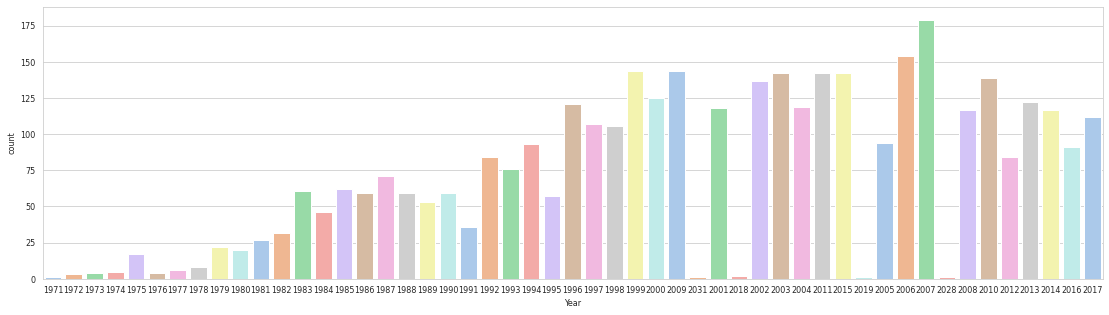

In [660]:
g = sns.countplot(x=odi_df['Year'],palette="pastel");

#### Q- Teams matches per month?

In [307]:
odi_df['Month'] = pd.DatetimeIndex(odi_df['Match_date']).month.astype('Int64')
#odi_df.info()
#type(odi_df['Month'])
#print(odi_df.Month)
m_y=odi_df.groupby(['Year','Month'])[['Scorecard']].count()
m_y.sort_values('Scorecard',ascending=False)


Scorecard
Year Month           
2011 3             34
2007 2             32
2003 2             31
1999 5             29
2015 3             28
...               ...
1985 8              1
     5              1
1984 9              1
     5              1
2031 5              1

[419 rows x 1 columns]

In [406]:
odi_df

,Scorecard,Team1,Team2,WinnerBatInnings,Ground,Match_date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,Year,Month
0,ODI # 1,Australia,England,2,Melbourne,1971-01-05,Australia,Australia,Home,Away,2,1,1971,1
1,ODI # 2,England,Australia,2,Manchester,1972-08-24,England,England,Home,Away,2,1,1972,8
2,ODI # 3,England,Australia,2,Lord's,1972-08-26,Australia,England,Home,Away,1,2,1972,8
3,ODI # 4,England,Australia,2,Birmingham,1972-08-28,England,England,Home,Away,2,1,1972,8
4,ODI # 5,New Zealand,Pakistan,1,Christchurch,1973-02-11,New Zealand,New Zealand,Home,Away,1,2,1973,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,ODI # 3931,India,New Zealand,2,Pune,2017-10-25,India,India,Home,Away,2,1,2017,10
3743,ODI # 3932,India,New Zealand,1,Kanpur,2017-10-29,India,India,Home,Away,1,2,2017,10
3744,ODI # 3933,Hong Kong,Namibia,2,Mumbai,2017-08-12,Namibia,India,Neutral,Neutral,1,2,2017,8
3745,ODI # 3934,Bermuda,U.S.A.,2,Mumbai,2017-08-12,U.S.A.,India,Neutral,Neutral,1,2,2017,8


#### Q- Teams wise division of home/away matches per year

In [319]:
odi_df

,Scorecard,Team1,Team2,WinnerBatInnings,Ground,Match_date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,Year,Month
0,ODI # 1,Australia,England,2,Melbourne,1971-01-05,Australia,Australia,Home,Away,2,1,1971,1
1,ODI # 2,England,Australia,2,Manchester,1972-08-24,England,England,Home,Away,2,1,1972,8
2,ODI # 3,England,Australia,2,Lord's,1972-08-26,Australia,England,Home,Away,1,2,1972,8
3,ODI # 4,England,Australia,2,Birmingham,1972-08-28,England,England,Home,Away,2,1,1972,8
4,ODI # 5,New Zealand,Pakistan,1,Christchurch,1973-02-11,New Zealand,New Zealand,Home,Away,1,2,1973,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,ODI # 3931,India,New Zealand,2,Pune,2017-10-25,India,India,Home,Away,2,1,2017,10
3743,ODI # 3932,India,New Zealand,1,Kanpur,2017-10-29,India,India,Home,Away,1,2,2017,10
3744,ODI # 3933,Hong Kong,Namibia,2,Mumbai,2017-08-12,Namibia,India,Neutral,Neutral,1,2,2017,8
3745,ODI # 3934,Bermuda,U.S.A.,2,Mumbai,2017-08-12,U.S.A.,India,Neutral,Neutral,1,2,2017,8


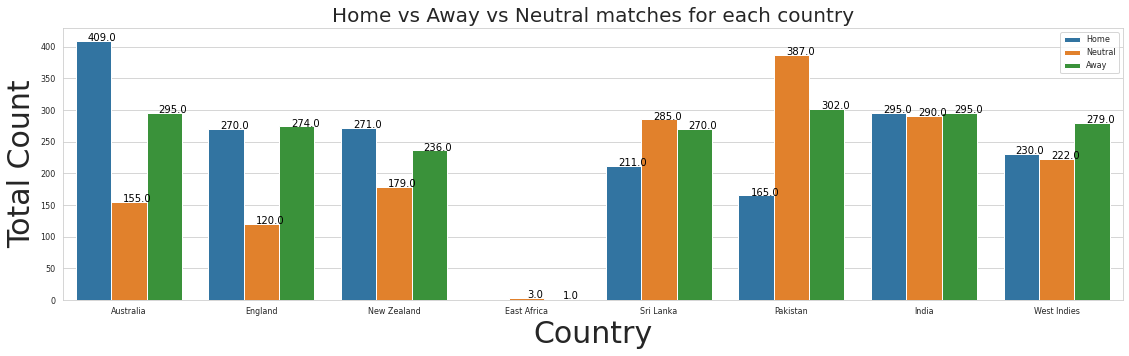

<Figure size 1296x432 with 0 Axes>

In [659]:
a=list(odi_df.Team1).copy()
b=list(odi_df.Team2).copy()

Teams=np.append(a,b)

x=list(odi_df.Venue_Team1).copy()
y=list(odi_df.Venue_Team2).copy()

Venues=np.append(x,y)
order=['Australia',
 'England',
 'New Zealand',
 'East Africa',
 'Sri Lanka',
 'Pakistan',
 'India',
 'West Indies']
g=sns.countplot(x=Teams,hue=Venues,order=order,orient = "v");
plt.title("Home vs Away vs Neutral matches for each country",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.ylabel("Total Count",fontsize=30)
plt.figure(figsize=(18,6))
for p in g.patches:
    g.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=10, ha="center");
plt.show();

Let us save and upload our work to Jovian before continuing

## Asking and Answering Questions

Let us explore some more interesting facts about this data set


Let's start off by finding the winners vs losers...

#### Q1: Team winning the most matches vs team losing the most??

In [449]:
# Rank 1
odi_df.Winner.mode()

0    Australia
dtype: object

In [450]:
# List of top 10 winners
top_10=odi_df.Winner.value_counts()
top10=top_10.head(10)
top10

Australia       552
India           475
Pakistan        466
West Indies     380
Sri Lanka       371
South Africa    361
England         343
New Zealand     324
Zimbabwe        129
Bangladesh      105
Name: Winner, dtype: int64

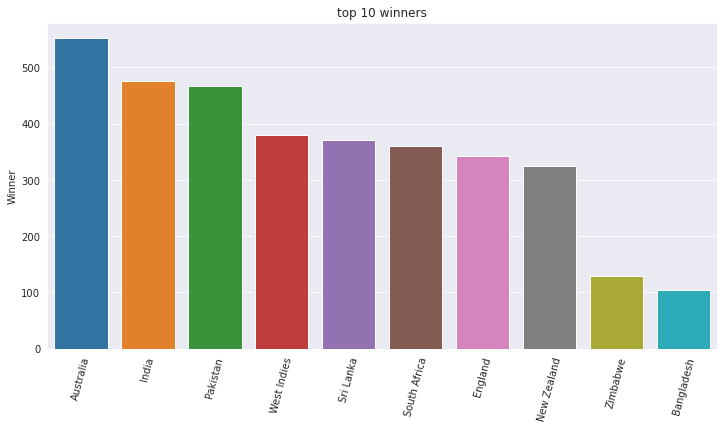

In [451]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('top 10 winners')
sns.barplot(x=top10.index,y=top10);

In [452]:
# Top 10 losers  
lw_10=odi_df.Winner.value_counts()
Best_losers=lw_10.tail(10).sort_values()
Best_losers

Namibia         1
U.S.A.          1
East Africa     1
P.N.G.          5
Hong Kong       6
Bermuda         7
U.A.E.          9
Canada         17
Netherlands    28
Scotland       31
Name: Winner, dtype: int64

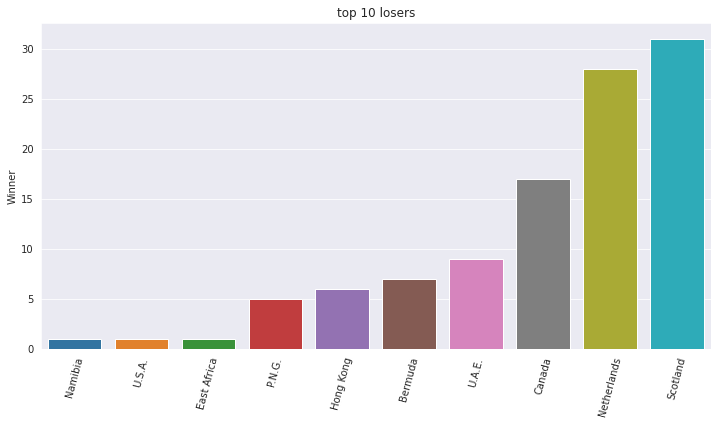

In [453]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('top 10 losers')
sns.barplot(x=Best_losers.index,y=Best_losers);

Afghanistan     48.148148
Australia       35.739232
Bangladesh      67.987805
Bermuda         80.555556
Canada          77.333333
East Africa     75.000000
England         48.343373
Hong Kong       66.666667
India           46.022727
Ireland         54.867257
Kenya           71.812081
Namibia         87.500000
Netherlands     61.111111
New Zealand     52.769679
P.N.G.          50.000000
Pakistan        45.433255
Scotland        64.367816
South Africa    35.650624
Sri Lanka       51.566580
U.A.E.          74.285714
U.S.A.          66.666667
West Indies     48.016416
Zimbabwe        72.784810
dtype: float64


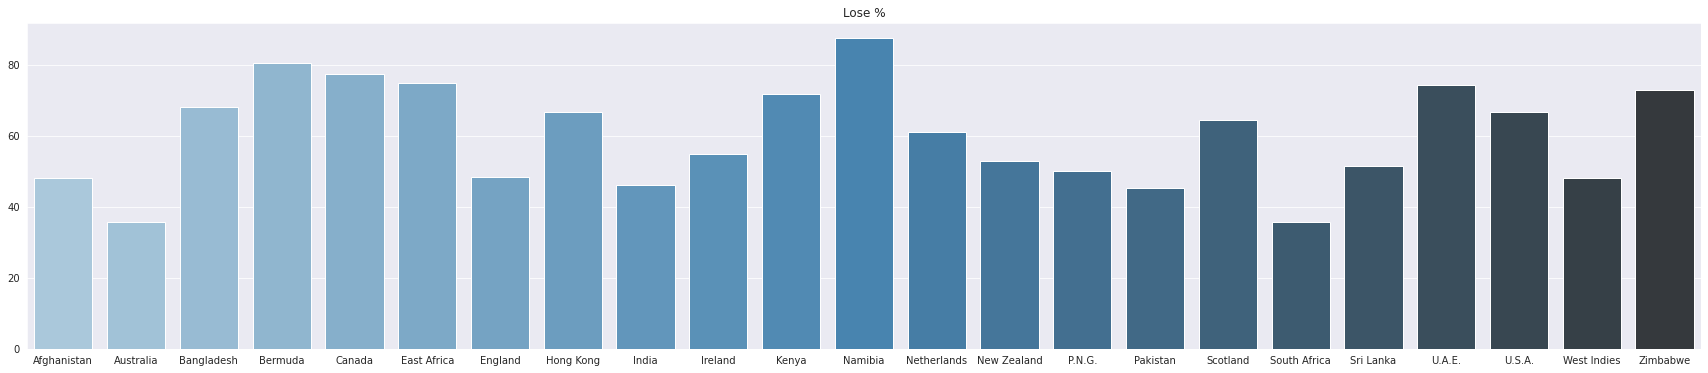

In [456]:
#Losers %
loss_pc=(1-lw_10/head_count)*100
print(loss_pc)
plt.figure(figsize=(30,6))
plt.title('Lose %')
sns.barplot(x=loss_pc.index,y=loss_pc,color="salmon",palette="Blues_d",);

Afghanistan     51.851852
Australia       64.260768
Bangladesh      32.012195
Bermuda         19.444444
Canada          22.666667
East Africa     25.000000
England         51.656627
Hong Kong       33.333333
India           53.977273
Ireland         45.132743
Kenya           28.187919
Namibia         12.500000
Netherlands     38.888889
New Zealand     47.230321
P.N.G.          50.000000
Pakistan        54.566745
Scotland        35.632184
South Africa    64.349376
Sri Lanka       48.433420
U.A.E.          25.714286
U.S.A.          33.333333
West Indies     51.983584
Zimbabwe        27.215190
dtype: float64


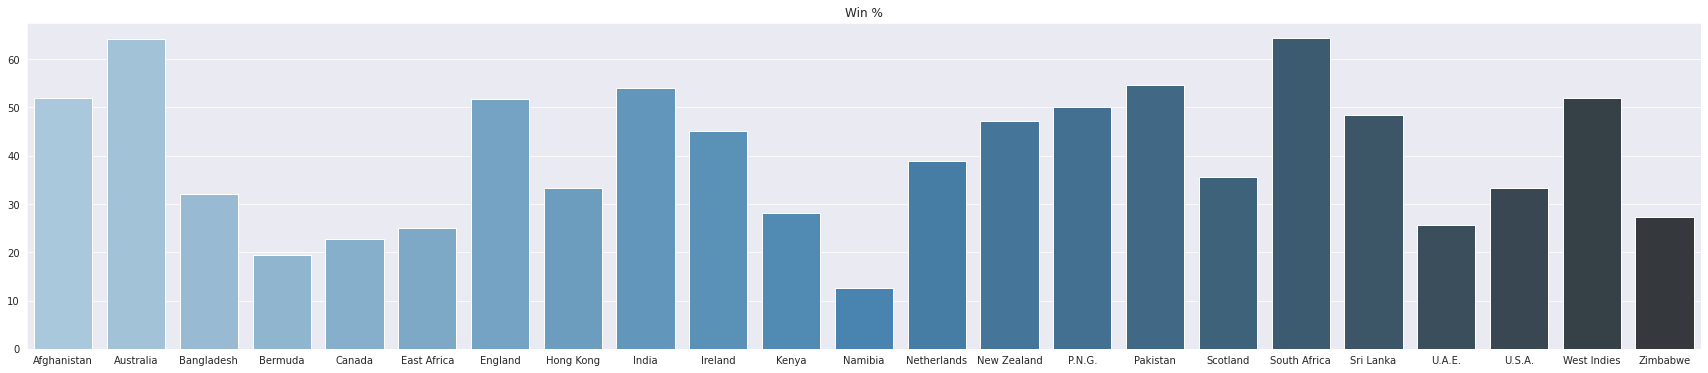

In [457]:
# Best win %
Win_pc=top_10/head_count*100
print(Win_pc)
plt.figure(figsize=(30,6))
plt.title('Win %')
sns.barplot(x=Win_pc.index,y=Win_pc,color="salmon",palette="Blues_d",);

#### Q2- Win % of team batting 1st or 2nd across all matches?


Text(0, 0.5, 'Team batting 1st or 2nd')

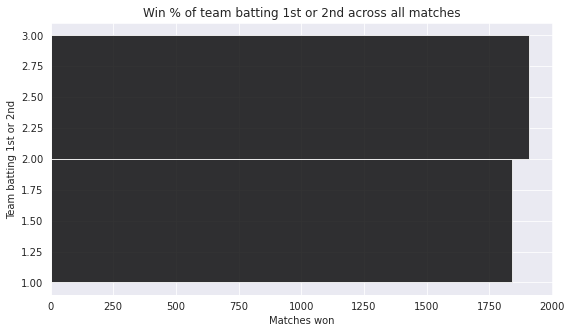

In [500]:
plt.title("Win % of team batting 1st or 2nd across all matches")
plt.hist(odi_df.WinnerBatInnings,bins=np.arange(1, 4, 1),histtype='barstacked',align='mid',orientation='horizontal',color='black',alpha=0.8)
plt.xlabel('Matches won')
plt.ylabel('Team batting 1st or 2nd')

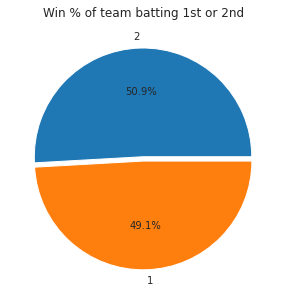

In [510]:
#pie_chart
plt.title('Win % of team batting 1st or 2nd')
win=odi_df.WinnerBatInnings.value_counts()
plt.pie(win,labels=win.index,autopct='%1.1f%%',explode=(.02,.02));

Batting first or second doesn't make much of a difference 

####  Which team won most matches batting first?

In [560]:
import statistics 
from statistics import mode


In [564]:
#(odi_df[odi_df.WinnerBatInnings==1].groupby('Team1')[['Scorecard']].count()).sort_values('Scorecard',ascending=False).head(10)
Team=np.array([])
x=odi_df[odi_df.WinnerBatInnings==1]
for y in x.Innings_Team1:
    if y==1:
        Teams=np.append(Team,x.Team1)
    else:
        Teams=np.append(Team,x.Team2)
print(mode(Teams))

Australia


#### Which team won most matches batting second?

In [565]:
Team=np.array([])
x=odi_df[odi_df.WinnerBatInnings==2]
for y in x.Innings_Team1:
    if y==2:
        Teams=np.append(Team,x.Team1)
    else:
        Teams=np.append(Team,x.Team2)
print(mode(Teams))

Pakistan


#### Q3: Home vs away matches

In [589]:
#Home_team_wins
x=odi_df[odi_df.Venue_Team1=='Home'] 
a1=(x.Winner==x.Team1).sum() 
y=odi_df[odi_df.Venue_Team2=='Home'] 
a2=(y.Winner==y.Team2).sum() 
a1+a2

1514

In [590]:
#Away wins
xc=odi_df[odi_df.Venue_Team1=='Away'] 
a1a=(xc.Winner==xc.Team1).sum() 
yc=odi_df[odi_df.Venue_Team2=='Away'] 
a2a=(yc.Winner==yc.Team2).sum() 
a1a+a2a

1095

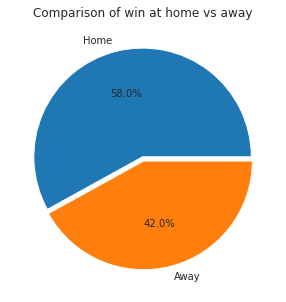

In [600]:
list1=[1514,1095]
labels=['Home','Away']
plt.title("Comparison of win at home vs away")
plt.pie(list1,labels=labels,autopct='%1.1f%%',explode=(.02,.02));

Teams are more comfortable playing at home and have better winning ratio at home 

#### Q4- Which host country has won most matches?

In [620]:
xa=(odi_df[odi_df.Winner==odi_df.Host_Country]).groupby('Winner')['Host_Country'].count().sort_values(ascending=False)
xa.index

Index(['Australia', 'India', 'South Africa', 'New Zealand', 'England',
       'Sri Lanka', 'West Indies', 'Pakistan', 'Bangladesh', 'Zimbabwe',
       'Kenya', 'Ireland', 'Scotland', 'Netherlands', 'U.A.E.', 'Canada',
       'Hong Kong'],
      dtype='object', name='Winner')

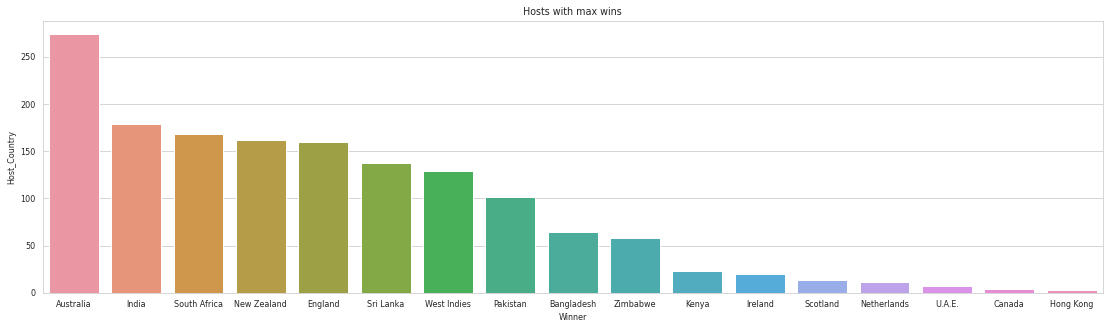

In [635]:
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (19, 5)
matplotlib.rcParams['figure.facecolor'] = '#90060000'
plt.title('Hosts with max wins')
plt.xlabel("Country")
plt.ylabel("Count")
sns.barplot(x=xa.index, y=xa);

Australia has won most number of matches while hosting it.

#### Q5-Which grounds are most favourable for chasing score?

In [649]:
((odi_df[odi_df.WinnerBatInnings==2]).groupby('Ground')[['Scorecard']].count()).sort_values('Scorecard',ascending=False)

,Scorecard
Ground,
Sharjah,104
Colombo,85
Dhaka,79
Melbourne,74
Harare,68
...,...
New Plymouth,1
Quetta,1
Darwin,1


#### Which grounds are most favourable for batting first?

In [653]:
((odi_df[odi_df.WinnerBatInnings==1]).groupby('Ground')[['Scorecard']].count()).sort_values('Scorecard',ascending=False)

,Scorecard
Ground,
Sharjah,122
Colombo,94
Sydney,86
Melbourne,76
Dhaka,75
...,...
Kwekwe,1
Queenstown,1
Pietermaritzburg,1


Interestingly Sharjah followed by Colombo are suitable for both batting 1st and 2nd.

## Inferences and Conclusion

1. First recorded ODI match was played on Jan 5,1971
2. Sharjah and colombo have hosted the most number of matches
3. India followed by Australia have played the most ODI matches
4. Pakistan has played most neutral venue games which is obvious as Teams rarely tour Pakistan due to securiy threats
5. Suprisingly only one-third games are played at Neutral venues
6. Year 2007 saw highest matches(179)
7. Australia, India have won most matches while associate nations like Scotland & Netherlands are top losers
8. Batting 1st or 2nd doesn't matter much as far as overall win:loss  is concerned.
9. Most teams dominate at home.


## References

1. Data set can be found at "https://www.kaggle.com/datasets/jaykay12/odi-cricket-matches-19712017"

In [4]:
import jovian

In [6]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nihalgupta012/zerotopandas-course-project-starter-nihal" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nihalgupta012/zerotopandas-course-project-starter-nihal


'https://jovian.ai/nihalgupta012/zerotopandas-course-project-starter-nihal'